In [263]:
from libact.base.dataset import Dataset
from libact.models import LogisticRegression
from libact.query_strategies.multiclass import UncertaintySampling
from libact.labelers import IdealLabeler
from pathlib import Path
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [54]:
DATA_FOLDER = Path('~/data/C50').expanduser()
TRAIN = DATA_FOLDER / 'C50train'
TEST = DATA_FOLDER / 'C50test'

In [162]:
train = []
for author_dir in TRAIN.iterdir():
    for text_file in author_dir.glob('*.txt'):
        with text_file.open() as f:
            text = f.read()
            author = author_dir.name
            train.append((text, author))
random.shuffle(train)
    
test = []
for author_dir in TEST.iterdir():
    for text_file in author_dir.glob('*.txt'):
        with text_file.open() as f:
            text = f.read()
            author = author_dir.name
            test.append((text, author))
random.shuffle(test)
            
assert len(train) == 2500
assert len(test) == 2500
    

In [163]:
train_texts, train_labels = zip(*train)

y_order = sorted(set(train_labels))
y_dict = {str_y: i for i, str_y in enumerate(y_order)}

train_y = np.array([y_dict[y] for y in train_labels], dtype=int)

test_texts, test_labels = zip(*test)
test_y = np.array([y_dict[y] for y in test_labels], dtype=int)


In [164]:
tfidf = TfidfVectorizer().fit(train_texts)
train_X = tfidf.transform(train_texts)

test_X  = tfidf.transform(test_texts)

/home/marat/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [225]:
def entropy_uncertainty(probs):
    return -(probs*np.log(probs)).sum(axis=1)

def margin_uncertainty(probs):
    first_best = probs.max(axis=1)
    second_best_id = np.argsort(probs)[:, -2]
    second_best = probs[np.arange(probs.shape[0]), second_best_id]
    return 1-first_best + second_best

def confidence_unceratainty(probs):
    return 1-probs.max(axis=1)

In [268]:
%%time

known = np.zeros(len(train_labels), dtype='bool')
known[0:10] = 1

entropy_uncertainty_history = []

for i in range(2490):
    model = LogisticRegression(n_jobs=-1, C=0.2).fit(train_X[known], train_y[known])
    predicted = model.predict(test_X)
    score = f1_score(test_y, predicted, average='micro')
    
    entropy_uncertainty_history.append(score)
    
    probs = model.predict_proba(train_X)
    uncertainty = entropy_uncertainty(probs)
    uncertainty[known] = 0
    known[np.argsort(uncertainty)[-1:]] = 1
    
    print(score, known.sum(), sep='\t')

/home/marat/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.082	11
0.084	12
0.0884	13
0.0908	14
0.092	15
0.09239999999999998	16
0.0976	17
0.1028	18
0.1068	19
0.10839999999999998	20
0.1128	21
0.1132	22
0.1152	23
0.0204	24
0.03	25
0.048	26
0.0516	27
0.0656	28
0.084	29
0.0832	30
0.08920000000000002	31
0.0912	32
0.09239999999999998	33
0.10839999999999998	34
0.126	35
0.126	36
0.1268	37
0.1296	38
0.1328	39
0.136	40
0.1416	41
0.1492	42
0.1572	43
0.1568	44
0.1568	45
0.1712	46
0.1704	47
0.0416	48
0.042	49
0.0592	50
0.0768	51
0.0764	52
0.0764	53
0.078	54
0.0832	55
0.1004	56
0.1036	57
0.106	58
0.106	59
0.1192	60
0.126	61
0.1424	62
0.1424	63
0.144	64
0.1576	65
0.1612	66
0.1732	67
0.1888	68
0.1888	69
0.1904	70
0.1904	71
0.1904	72
0.1912	73
0.1948	74
0.2088	75
0.2092	76
0.2092	77
0.2116	78
0.2196	79
0.2292	80
0.2292	81
0.2292	82
0.2292	83
0.0792	84
0.0808	85
0.082	86
0.0784	87
0.0936	88
0.0936	89
0.094	90
0.0944	91
0.102	92
0.1036	93
0.10839999999999998	94
0.1116	95
0.1232	96
0.124	97
0.1284	98
0.1284	99
0.1296	100
0.1296	101
0.1336	102
0.146	103
0.1528	10

0.5004	710
0.5004	711
0.5016	712
0.5048	713
0.5072	714
0.5076	715
0.4908	716
0.4908	717
0.4888	718
0.4916	719
0.492	720
0.4936	721
0.4888	722
0.4896	723
0.4444	724
0.4484	725
0.4508	726
0.4516	727
0.456	728
0.4564	729
0.4624	730
0.4676	731
0.4744	732
0.4784	733
0.482	734
0.482	735
0.482	736
0.4848	737
0.4892	738
0.494	739
0.4964	740
0.5036	741
0.5032	742
0.5052	743
0.5056	744
0.51	745
0.5116	746
0.5152	747
0.5144	748
0.52	749
0.5144	750
0.5116	751
0.4976	752
0.4972	753
0.5016	754
0.5048	755
0.5048	756
0.5032	757
0.5028	758
0.5024	759
0.5032	760
0.5068	761
0.5084	762
0.51	763
0.5116	764
0.5116	765
0.5124	766
0.516	767
0.47040000000000004	768
0.4752	769
0.478	770
0.4848	771
0.488	772
0.4904	773
0.4876	774
0.4868	775
0.4908	776
0.4944	777
0.4944	778
0.4972	779
0.5024	780
0.4936	781
0.4952	782
0.4976	783
0.4996	784
0.5028	785
0.4916	786
0.488	787
0.4888	788
0.4872	789
0.4892	790
0.4944	791
0.4964	792
0.496	793
0.4988	794
0.4996	795
0.5004	796
0.4956	797
0.4972	798
0.4984	799
0.5	800
0.5032

0.544	1432
0.5452	1433
0.5452	1434
0.5464	1435
0.5472	1436
0.5488	1437
0.5492	1438
0.5488	1439
0.55	1440
0.552	1441
0.55	1442
0.5496	1443
0.55	1444
0.5516	1445
0.5544	1446
0.5552	1447
0.5548	1448
0.5572	1449
0.5576	1450
0.5576	1451
0.5576	1452
0.5572	1453
0.5588	1454
0.5588	1455
0.56	1456
0.5612	1457
0.5628	1458
0.5656	1459
0.57	1460
0.5612	1461
0.5604	1462
0.5604	1463
0.5608	1464
0.5608	1465
0.558	1466
0.558	1467
0.5592	1468
0.562	1469
0.562	1470
0.5636	1471
0.5636	1472
0.5652	1473
0.5648	1474
0.5676	1475
0.5676	1476
0.5676	1477
0.5672	1478
0.5596	1479
0.5604	1480
0.5596	1481
0.5576	1482
0.5584	1483
0.5584	1484
0.5596	1485
0.5596	1486
0.56	1487
0.5608	1488
0.5616	1489
0.5616	1490
0.562	1491
0.5656	1492
0.564	1493
0.564	1494
0.5652	1495
0.5664	1496
0.568	1497
0.5652	1498
0.5668	1499
0.5684	1500
0.5648	1501
0.5648	1502
0.5604	1503
0.5616	1504
0.5584	1505
0.5568	1506
0.5572	1507
0.5576	1508
0.5576	1509
0.5588	1510
0.5596	1511
0.5576	1512
0.5584	1513
0.5592	1514
0.5592	1515
0.5564	1516
0.

0.6032	2131
0.6044	2132
0.6052	2133
0.6048	2134
0.606	2135
0.606	2136
0.6052	2137
0.6052	2138
0.6088	2139
0.6088	2140
0.6096	2141
0.6088	2142
0.6088	2143
0.6096	2144
0.6088	2145
0.6088	2146
0.6092	2147
0.6112	2148
0.6112	2149
0.6088	2150
0.6092	2151
0.61	2152
0.61	2153
0.6092	2154
0.6096	2155
0.61	2156
0.6096	2157
0.6108	2158
0.6092	2159
0.6088	2160
0.6096	2161
0.6096	2162
0.6104	2163
0.61	2164
0.61	2165
0.6112	2166
0.6112	2167
0.6104	2168
0.6112	2169
0.6104	2170
0.6116	2171
0.6136	2172
0.6136	2173
0.6132	2174
0.6124	2175
0.6108	2176
0.6108	2177
0.6108	2178
0.6104	2179
0.6104	2180
0.6084	2181
0.6084	2182
0.6076	2183
0.6076	2184
0.608	2185
0.6088	2186
0.6092	2187
0.6096	2188
0.6104	2189
0.6116	2190
0.612	2191
0.6116	2192
0.6132	2193
0.6136	2194
0.6136	2195
0.6136	2196
0.6136	2197
0.612	2198
0.6132	2199
0.6132	2200
0.6132	2201
0.6128	2202
0.6124	2203
0.6136	2204
0.6136	2205
0.6124	2206
0.6128	2207
0.614	2208
0.6152	2209
0.6152	2210
0.6152	2211
0.6144	2212
0.614	2213
0.614	2214
0.6144	221

In [269]:
%%time

known = np.zeros(len(train_labels), dtype='bool')
known[0:10] = 1

margin_uncertainty_history = []

for i in range(2490):
    model = LogisticRegression(n_jobs=-1, C=0.2).fit(train_X[known], train_y[known])
    predicted = model.predict(test_X)
    score = f1_score(test_y, predicted, average='micro')
    
    margin_uncertainty_history.append(score)
    
    probs = model.predict_proba(train_X)
    uncertainty = margin_uncertainty(probs)
    uncertainty[known] = 0
    known[np.argsort(uncertainty)[-1:]] = 1
    
    print(score, known.sum(), sep='\t')

0.082	11
0.02	12
0.0348	13
0.0344	14
0.0372	15


/home/marat/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.0372	16
0.0376	17
0.0376	18
0.0456	19
0.0464	20
0.046	21
0.02	22
0.034	23
0.034	24
0.034	25
0.034	26
0.0436	27
0.0432	28
0.0432	29
0.0432	30
0.0508	31
0.0216	32
0.0324	33
0.0324	34
0.0324	35
0.0324	36
0.0324	37
0.0324	38
0.0324	39
0.04	40
0.04	41
0.04	42
0.04	43
0.04	44
0.0488	45
0.066	46
0.066	47
0.066	48
0.066	49
0.066	50
0.072	51
0.072	52
0.072	53
0.072	54
0.072	55
0.072	56
0.072	57
0.072	58
0.072	59
0.072	60
0.0808	61
0.092	62
0.092	63
0.092	64
0.0992	65
0.10000000000000002	66
0.10000000000000002	67
0.10000000000000002	68
0.05279999999999999	69
0.05279999999999999	70
0.05279999999999999	71
0.053200000000000004	72
0.0628	73
0.0632	74
0.0632	75
0.0632	76
0.0632	77
0.0632	78
0.0636	79
0.0636	80
0.0636	81
0.064	82
0.0644	83
0.0648	84
0.0672	85
0.0716	86
0.0748	87
0.0748	88
0.0748	89
0.0748	90
0.0748	91
0.0932	92
0.094	93
0.0944	94
0.09480000000000001	95
0.09480000000000001	96
0.0952	97
0.104	98
0.1048	99
0.106	100
0.1172	101
0.1264	102
0.1384	103
0.138	104
0.138	105
0.1468	106
0.1492

0.46359999999999996	718
0.4664	719
0.4688	720
0.4572	721
0.4576	722
0.46159999999999995	723
0.462	724
0.4652	725
0.472	726
0.4776	727
0.4796	728
0.4796	729
0.4796	730
0.4708	731
0.474	732
0.4752	733
0.4776	734
0.4792	735
0.4684	736
0.4692	737
0.47040000000000004	738
0.4736	739
0.4752	740
0.4788	741
0.4796	742
0.4816	743
0.4824	744
0.4856	745
0.4856	746
0.486	747
0.4808	748
0.4836	749
0.4904	750
0.4912	751
0.4752	752
0.4756	753
0.4788	754
0.4784	755
0.4784	756
0.4832	757
0.4776	758
0.4776	759
0.4792	760
0.48	761
0.4828	762
0.4732	763
0.4724	764
0.4748	765
0.4796	766
0.4804	767
0.4808	768
0.4756	769
0.4756	770
0.4764	771
0.466	772
0.4664	773
0.4672	774
0.4656	775
0.4684	776
0.4712	777
0.4732	778
0.4708	779
0.4732	780
0.4748	781
0.476	782
0.4768	783
0.4772	784
0.4792	785
0.4848	786
0.4856	787
0.4764	788
0.4804	789
0.4848	790
0.4852	791
0.486	792
0.4872	793
0.49	794
0.4892	795
0.4904	796
0.4908	797
0.492	798
0.4912	799
0.49	800
0.4892	801
0.492	802
0.4964	803
0.4964	804
0.498	805
0.4956	80

0.5452	1434
0.5468	1435
0.5488	1436
0.5416	1437
0.544	1438
0.5348	1439
0.5316	1440
0.5328	1441
0.5332	1442
0.534	1443
0.532	1444
0.5328	1445
0.5336	1446
0.532	1447
0.5312	1448
0.5292	1449
0.5312	1450
0.5304	1451
0.5312	1452
0.5316	1453
0.5316	1454
0.5348	1455
0.5344	1456
0.5348	1457
0.536	1458
0.5368	1459
0.5388	1460
0.5404	1461
0.534	1462
0.5344	1463
0.5352	1464
0.5372	1465
0.5392	1466
0.5404	1467
0.542	1468
0.5432	1469
0.5416	1470
0.544	1471
0.5436	1472
0.5452	1473
0.5468	1474
0.5472	1475
0.5476	1476
0.5492	1477
0.5492	1478
0.5488	1479
0.5492	1480
0.5496	1481
0.5468	1482
0.5492	1483
0.5496	1484
0.5468	1485
0.5448	1486
0.5484	1487
0.5484	1488
0.5444	1489
0.5456	1490
0.5484	1491
0.5476	1492
0.548	1493
0.5424	1494
0.5424	1495
0.5428	1496
0.5444	1497
0.5368	1498
0.5368	1499
0.5244	1500
0.526	1501
0.526	1502
0.5264	1503
0.5276	1504
0.5284	1505
0.5288	1506
0.5272	1507
0.5284	1508
0.5316	1509
0.532	1510
0.5312	1511
0.5316	1512
0.53	1513
0.5308	1514
0.5288	1515
0.5276	1516
0.5296	1517
0.5304

0.6072	2132
0.6064	2133
0.6072	2134
0.6084	2135
0.608	2136
0.608	2137
0.6076	2138
0.6072	2139
0.6064	2140
0.6072	2141
0.6076	2142
0.6076	2143
0.6084	2144
0.6088	2145
0.6088	2146
0.6084	2147
0.6088	2148
0.608	2149
0.6092	2150
0.61	2151
0.61	2152
0.6104	2153
0.6108	2154
0.6108	2155
0.6104	2156
0.6108	2157
0.6116	2158
0.6108	2159
0.6104	2160
0.6108	2161
0.6104	2162
0.6108	2163
0.6108	2164
0.612	2165
0.61	2166
0.6104	2167
0.6104	2168
0.612	2169
0.612	2170
0.6112	2171
0.6108	2172
0.6116	2173
0.6108	2174
0.6108	2175
0.6104	2176
0.6096	2177
0.6096	2178
0.6104	2179
0.6104	2180
0.6108	2181
0.6112	2182
0.6112	2183
0.6116	2184
0.6084	2185
0.6068	2186
0.6076	2187
0.6092	2188
0.6104	2189
0.6108	2190
0.6112	2191
0.6116	2192
0.6124	2193
0.6116	2194
0.612	2195
0.612	2196
0.6116	2197
0.6116	2198
0.612	2199
0.612	2200
0.6132	2201
0.6136	2202
0.6148	2203
0.6144	2204
0.6148	2205
0.6152	2206
0.6156	2207
0.6156	2208
0.6152	2209
0.6156	2210
0.6152	2211
0.616	2212
0.6152	2213
0.6156	2214
0.6152	2215
0.6144	22

In [270]:
%%time

known = np.zeros(len(train_labels), dtype='bool')
known[0:10] = 1

confidence_unceratainty_history = []

for i in range(2490):
    model = LogisticRegression(n_jobs=-1, C=0.2).fit(train_X[known], train_y[known])
    predicted = model.predict(test_X)
    score = f1_score(test_y, predicted, average='micro')
    
    confidence_unceratainty_history.append(score)
    
    probs = model.predict_proba(train_X)
    uncertainty = confidence_unceratainty(probs)
    uncertainty[known] = 0
    known[np.argsort(uncertainty)[-1:]] = 1
    
    print(score, known.sum(), sep='\t')

0.082	11
0.084	12
0.0864	13
0.0916	14


/home/marat/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.092	15
0.0932	16
0.0984	17
0.0988	18
0.1016	19
0.1028	20
0.0204	21
0.0396	22
0.051199999999999996	23
0.05279999999999999	24
0.0668	25
0.0216	26
0.0216	27
0.0228	28
0.0228	29
0.0228	30
0.0228	31
0.0232	32
0.0232	33
0.0252	34
0.0276	35
0.0288	36
0.0476	37
0.0472	38
0.0472	39
0.0472	40
0.0476	41
0.05600000000000001	42
0.05600000000000001	43
0.05600000000000001	44
0.0564	45
0.0564	46
0.05600000000000001	47
0.05600000000000001	48
0.0556	49
0.06	50
0.0724	51
0.0724	52
0.0464	53
0.0508	54
0.0608	55
0.0732	56
0.0732	57
0.0624	58
0.0636	59
0.0644	60
0.0632	61
0.078	62
0.078	63
0.0784	64
0.078	65
0.0776	66
0.0788	67
0.0776	68
0.0776	69
0.078	70
0.0788	71
0.0928	72
0.1008	73
0.1104	74
0.1232	75
0.1236	76
0.1236	77
0.1252	78
0.1368	79
0.1368	80
0.1368	81
0.1368	82
0.1372	83
0.1372	84
0.1368	85
0.136	86
0.136	87
0.136	88
0.136	89
0.1428	90
0.1432	91
0.1416	92
0.0928	93
0.10559999999999999	94
0.10559999999999999	95
0.1048	96
0.1052	97
0.10559999999999999	98
0.1136	99
0.116	100
0.122	101
0.132	102


0.5348	720
0.5384	721
0.5408	722
0.5428	723
0.5368	724
0.5364	725
0.5392	726
0.538	727
0.538	728
0.538	729
0.538	730
0.538	731
0.5308	732
0.5284	733
0.528	734
0.5284	735
0.5304	736
0.5304	737
0.5304	738
0.5328	739
0.5292	740
0.5308	741
0.5268	742
0.5284	743
0.53	744
0.5276	745
0.526	746
0.526	747
0.5264	748
0.5268	749
0.5164	750
0.5172	751
0.5204	752
0.5244	753
0.526	754
0.5308	755
0.5324	756
0.5344	757
0.5348	758
0.5308	759
0.5296	760
0.5248	761
0.526	762
0.5068	763
0.5072	764
0.5048	765
0.502	766
0.5056	767
0.498	768
0.4952	769
0.4992	770
0.4996	771
0.5024	772
0.4948	773
0.4972	774
0.4956	775
0.4936	776
0.4932	777
0.4956	778
0.4944	779
0.4992	780
0.5016	781
0.5052	782
0.5092	783
0.5108	784
0.5148	785
0.52	786
0.5128	787
0.5128	788
0.5152	789
0.5164	790
0.5168	791
0.5148	792
0.5132	793
0.5148	794
0.5184	795
0.5208	796
0.5204	797
0.5212	798
0.5204	799
0.5224	800
0.5228	801
0.5248	802
0.5256	803
0.526	804
0.5236	805
0.5272	806
0.5264	807
0.5296	808
0.5304	809
0.5312	810
0.532	811
0.5328

0.6112	1440
0.6136	1441
0.614	1442
0.6104	1443
0.6116	1444
0.6124	1445
0.6128	1446
0.6136	1447
0.6148	1448
0.6148	1449
0.6144	1450
0.616	1451
0.616	1452
0.6168	1453
0.6164	1454
0.612	1455
0.6092	1456
0.6032	1457
0.6036	1458
0.604	1459
0.6036	1460
0.6012	1461
0.6012	1462
0.6016	1463
0.6008	1464
0.6012	1465
0.6016	1466
0.6016	1467
0.6012	1468
0.6008	1469
0.6008	1470
0.6004	1471
0.6004	1472
0.598	1473
0.5964	1474
0.5968	1475
0.5988	1476
0.602	1477
0.604	1478
0.6048	1479
0.6056	1480
0.606	1481
0.6084	1482
0.6112	1483
0.6128	1484
0.6124	1485
0.6132	1486
0.6092	1487
0.6116	1488
0.61	1489
0.61	1490
0.61	1491
0.6096	1492
0.612	1493
0.6128	1494
0.614	1495
0.614	1496
0.6112	1497
0.6128	1498
0.6128	1499
0.6108	1500
0.6112	1501
0.6112	1502
0.614	1503
0.6124	1504
0.612	1505
0.6096	1506
0.608	1507
0.6092	1508
0.6088	1509
0.6096	1510
0.6096	1511
0.6108	1512
0.6108	1513
0.6116	1514
0.6116	1515
0.612	1516
0.612	1517
0.6112	1518
0.6116	1519
0.6112	1520
0.6044	1521
0.6028	1522
0.604	1523
0.6056	1524
0.60

0.6148	2136
0.6184	2137
0.618	2138
0.6184	2139
0.618	2140
0.6184	2141
0.6184	2142
0.6188	2143
0.6188	2144
0.6188	2145
0.6152	2146
0.6156	2147
0.6156	2148
0.6156	2149
0.6156	2150
0.6148	2151
0.6148	2152
0.6148	2153
0.6156	2154
0.6164	2155
0.6164	2156
0.6176	2157
0.6176	2158
0.6176	2159
0.6156	2160
0.6144	2161
0.6152	2162
0.614	2163
0.6152	2164
0.6152	2165
0.6144	2166
0.6148	2167
0.6152	2168
0.6156	2169
0.6132	2170
0.6132	2171
0.612	2172
0.6116	2173
0.6092	2174
0.6096	2175
0.6076	2176
0.6076	2177
0.6076	2178
0.6088	2179
0.6088	2180
0.6088	2181
0.6084	2182
0.6088	2183
0.6084	2184
0.6084	2185
0.6084	2186
0.6084	2187
0.6084	2188
0.6088	2189
0.6084	2190
0.6096	2191
0.61	2192
0.6092	2193
0.6096	2194
0.6084	2195
0.6084	2196
0.6108	2197
0.6108	2198
0.6108	2199
0.6108	2200
0.6108	2201
0.6108	2202
0.614	2203
0.6116	2204
0.6136	2205
0.6144	2206
0.616	2207
0.616	2208
0.6156	2209
0.6156	2210
0.616	2211
0.6132	2212
0.6148	2213
0.6136	2214
0.6148	2215
0.6156	2216
0.6156	2217
0.6144	2218
0.6132	2219
0.

In [271]:
%%time

known = np.zeros(len(train_labels), dtype='bool')
known[0:10] = 1

rnd_history = []

for i in range(498):
    model = LogisticRegression(n_jobs=-1, C=0.2).fit(train_X[known], train_y[known])
    predicted = model.predict(test_X)
    score = f1_score(test_y, predicted, average='micro')
    
    rnd_history.append(score)    
    known[known.argsort()[:5]] = 1
    
    print(score, known.sum(), sep='\t')

0.082	15
0.02	20
0.0396	25
0.0204	30


/home/marat/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.0224	35
0.0228	40
0.02	45
0.0204	50
0.0388	55
0.0592	60
0.06	65
0.0244	70
0.0248	75
0.0328	80
0.0336	85
0.034	90
0.05279999999999999	95
0.0556	100
0.0652	105
0.0404	110
0.0428	115
0.046	120
0.0468	125
0.0424	130
0.048	135
0.0684	140
0.0796	145
0.0732	150
0.0732	155
0.0736	160
0.0748	165
0.082	170
0.09	175
0.0984	180
0.10839999999999998	185
0.1088	190
0.11200000000000002	195
0.1112	200
0.10239999999999999	205
0.1196	210
0.1316	215
0.1204	220
0.118	225
0.1264	230
0.102	235
0.1032	240
0.10839999999999998	245
0.094	250
0.0744	255
0.0872	260
0.0944	265
0.10239999999999999	270
0.10559999999999999	275
0.108	280
0.11200000000000002	285
0.1196	290
0.128	295
0.132	300
0.1444	305
0.1476	310
0.1544	315
0.1672	320
0.1372	325
0.1416	330
0.1476	335
0.1556	340
0.1704	345
0.1748	350
0.1824	355
0.18839999999999998	360
0.18960000000000002	365
0.1948	370
0.2044	375
0.2208	380
0.22400000000000003	385
0.2348	390
0.24	395
0.262	400
0.2708	405
0.28	410
0.28	415
0.2824	420
0.296	425
0.2916	430
0.2884	435
0.2

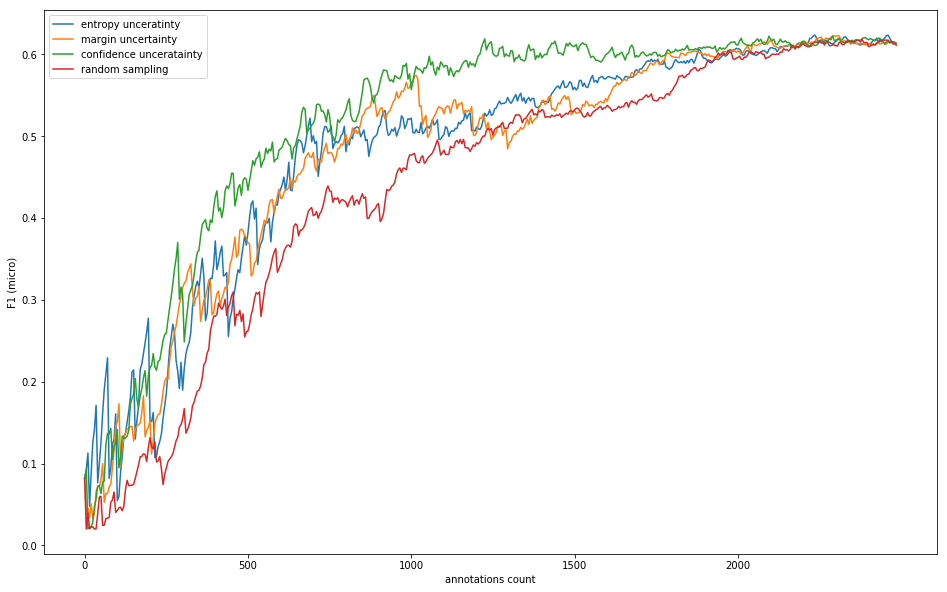

In [272]:
plt.figure(figsize=(16, 10))
plt.plot(entropy_uncertainty_history[::5], label='entropy unceratinty')
plt.plot(margin_uncertainty_history[::5], label='margin uncertainty')
plt.plot(confidence_unceratainty_history[::5], label='confidence unceratainty')
plt.plot(rnd_history, label='random sampling')
plt.legend()
plt.xticks(range(0, 500, 100), range(0, 2500, 500))
plt.xlabel('annotations count')
plt.ylabel('F1 (micro)')
plt.show()

#PERHAPS NEEDS TO RERUN THIS CELL!

In [174]:
np.argsort([[3, 1, 2], [3, 2, 1]])

array([[1, 2, 0],
       [2, 1, 0]])